# Tutorial 2: Taxa
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/pyinat/pyinaturalist/main?filepath=examples%2FTutorial_2_Taxa.ipynb)

This notebook will give a quick introduction to searching taxa.

In [1]:
import altair as alt
import ipyplot
import pandas as pd
from IPython.display import Image
from pyinaturalist import (
    Taxon,
    enable_logging,
    get_taxa,
    get_taxa_autocomplete,
    get_taxa_by_id,
    pprint,
)
from rich import print

enable_logging()

## Basic taxon search
Let's say you partially remember either a genus or family name that started with **'vespi'**-something.
The [taxa endpoint](https://pyinaturalist.readthedocs.io/en/stable/modules/pyinaturalist.v1.taxa.html#pyinaturalist.v1.taxa.get_taxa)
can be used to search by name, rank, and several other criteria

In [2]:
response = get_taxa(q='vespi', rank=['genus', 'family'])
taxa = Taxon.from_json_list(response)

## Taxon data
As with observations, there is a lot of information in the response:

In [3]:
print(taxa[0])

Taxon(
    id=52747,
    ancestor_ids=[
        48460,
        1,
        47120,
        372739,
        47158,
        184884,
        47201,
        124417,
        326777,
        48740,
        52747
    ],
    complete_rank=None,
    complete_species_count=None,
    created_at=None,
    current_synonymous_taxon_ids=[],
    extinct=False,
    iconic_taxon_id=47158,
    iconic_taxon_name='Insecta',
    is_active=True,
    listed_taxa_count=None,
    matched_term='Vespidae',
    name='Vespidae',
    names=[],
    observations_count=314925,
    parent_id=48740,
    preferred_common_name='Hornets, Paper Wasps, Potter Wasps, and Allies',
    preferred_establishment_means=None,
    rank_level=30,
    rank='family',
    taxon_changes_count=0,
    taxon_schemes_count=2,
    vision=None,
    wikipedia_summary=None,
    wikipedia_url='http://en.wikipedia.org/wiki/Vespidae',
    ancestors=[],
    children=[],
    conservation_status=None,
    conservation_statuses=[],
    default_photo=[13765] 
https://inaturalist-open-data.s3.amazonaws.com/photos/13765/original.jpg?1545358964 
(CC-BY-NC-SA, 1024x679),
    establishment_means=None,
    listed_taxa=[],
    taxon_photos=[]
)

## Previewing data
And we can get a condensed preview with `pprint()`:

In [4]:
pprint(taxa)

 ID        Rank     Scientific name   Common name                                     
 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 
  52747     family   🐝 Vespidae       Hornets, Paper Wasps, Potter Wasps, and Allies  
  92786     genus    🐟 Vespicula                                                      
  84737     genus    🦋 Vespina                                                        
  250566    genus    🐝 Vespita                                                        
  646195    genus    🪰 Vespiodes                                                      
  1007575   genus    🦋 Vespitinea                                                    

## Searching by parent ID
Oh, that's right, it was **'Vespidae'**! Now let's find all of its subfamilies using its taxon ID
from the results above:

In [5]:
response = get_taxa(parent_id=52747)
pprint(response)

 ID       Rank        Scientific name     Common name                
 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 
  343248   subfamily   🐝 Polistinae       Paper Wasps                
  84738    subfamily   🐝 Vespinae         Hornets and Yellowjackets  
  119344   subfamily   🐝 Eumeninae        Potter and Mason Wasps     
  121511   subfamily   🐝 Masarinae        Pollen Wasps               
  522215   subfamily   🐝 Stenogastrinae   Hover Wasps                
  343388   subfamily   🐝 Euparagiinae                               

## Autocomplete search
There is a [taxon autocomplete](https://pyinaturalist.readthedocs.io/en/stable/modules/pyinaturalist.v1.taxa.html#pyinaturalist.v1.taxa.get_taxa_autocomplete)
text search endpoint, which is intended for autocomplete interfaces like the one on iNaturalist.org:

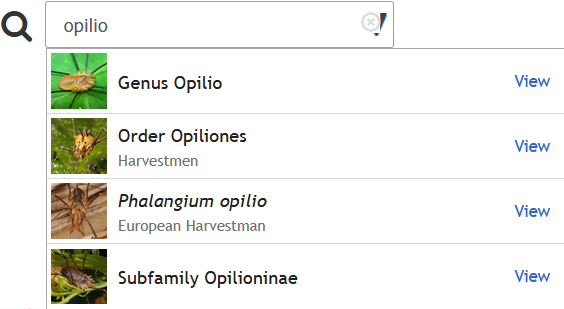

But it also provides an easy way to search the iNaturalist taxonomy database by taxon name.
Here is a quick example that will run searches from console input. Try a few different searches:

In [6]:
while True:
    query = input("> ")
    if query == 'exit':
        break
    response = get_taxa_autocomplete(q=query)
    pprint(response)

> opilio


 ID       Rank        Scientific name             Common name               
 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 
  527573   genus       🕷️ Opilio                                              
  47367    order       🕷️ Opiliones                 Harvestmen                
  84644    species     🕷️ Phalangium opilio         European Harvestman       
  527419   subfamily   🕷️ Opilioninae                                         
  527576   species     🕷️ Opilio canestrinii        Canestrini's Harvestman   
  488349   species     🕷️ Rilaena triangularis      Spring Harvestman         
  324310   species     🕷️ Mitopus morio             Saddleback Harvestman     
  527483   species     🕷️ Paroligolophus agrestis                             
  57325    family      🕷️ Sclerosomatidae           Sclerosomatid Harvestmen  
  527479   species     🕷️ Oligolophus tridens                                

> coleo


 ID       Rank        Scientific name            Common name                          
 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 
  372759   subclass    🐙 Coleoidea               Octopuses, Squids, and Cuttlefishes  
  47208    order       🪲 Coleoptera              Beetles                              
  359229   species     🦋 Coleotechnites florae   Coleotechnites Flower Moth           
  126268   genus       🐞 Coleomegilla                                                 
  126267   species     🐞 Coleomegilla maculata   Spotted Pink Ladybeetle              
  53502    genus       🌼 Brickellia              brickellbushes                       
  85704    family      🦋 Coleophoridae           Casebearing Moths                    
  479709   subfamily   🦋 Coleophorinae                                                
  87566    genus       🦋 Coleophora              Casebearers                          
  321675   species     🦋 Coleophora mayrella     Metallic Coleophora Moth            

> exit
